# BIG DATA ANALYTICS - Project - GROUP B

## Group Members

| Student Name | Student ID |
|----------|----------|
| Allyssa Sampath    | 816032362     |
| Avinash Roopnarine    | 816029635     |
| Jared Heeralal    | 816030252     |
| Kimberly Moses   | 816031494     |


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [24]:
df = pd.read_excel('../Dataset/HR_Employee_Data.xlsx')

df.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp_Id                 14999 non-null  object 
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   Department             14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB


In [137]:
print(df['left'].value_counts())

left
0    11428
1     3571
Name: count, dtype: int64


#Cleaning

In [25]:
import sys
sys.path.insert(0, '../DataPreprocessing')
from data_cleaning import *

# df = df.drop(['Emp_Id'], axis=1)

#One hot encode Department and salary
df = one_hot_encode(df)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14999 non-null  float64
 1   last_evaluation         14999 non-null  float64
 2   number_project          14999 non-null  int64  
 3   average_montly_hours    14999 non-null  int64  
 4   time_spend_company      14999 non-null  int64  
 5   Work_accident           14999 non-null  int64  
 6   left                    14999 non-null  int64  
 7   promotion_last_5years   14999 non-null  int64  
 8   Department_IT           14999 non-null  bool   
 9   Department_RandD        14999 non-null  bool   
 10  Department_accounting   14999 non-null  bool   
 11  Department_hr           14999 non-null  bool   
 12  Department_management   14999 non-null  bool   
 13  Department_marketing    14999 non-null  bool   
 14  Department_product_mng  14999 non-null

A pairplot is a grid of scatterplots showing the relationship between pairs of variables in a dataset.

**Commented out below to reduce running time**

In [ ]:
# Perform exploratory data analysis (EDA)
# Visualize feature distributions and relationships

# sns.pairplot(df, diag_kind='kde', hue='left')
# plt.show()

# sns.pairplot(df, hue='left', palette='Set2')
# plt.show()

#K-Means for Employee Clustering

In [ ]:
# # Calculate and visualise correlation matrix
# correlation_matrix = df.corr()

# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()

In [26]:
# top important features from feature importance
# selected_features = ['satisfaction_level', 'number_project']
selected_features = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours']

df_subset = df[selected_features]

print("DataFrame with Selected Features:")
df_subset.head()

DataFrame with Selected Features:


,satisfaction_level,last_evaluation,number_project,average_montly_hours
0,0.38,0.53,2,157
1,0.80,0.86,5,262
2,0.11,0.88,7,272
3,0.72,0.87,5,223
4,0.37,0.52,2,159


# new start

In [27]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_subset)

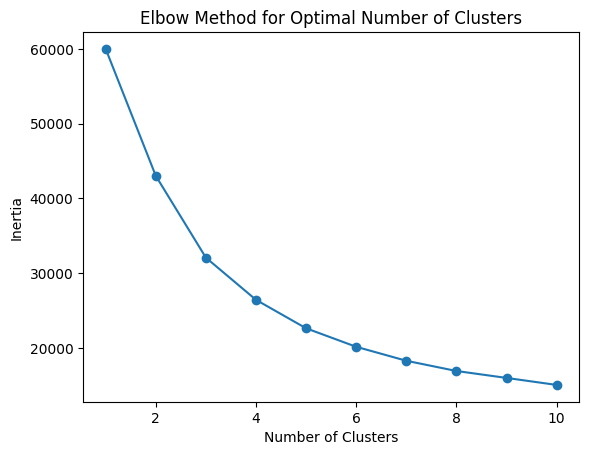

In [69]:
# # Elbow method
# inertia_values = []
# num_clusters_range = range(1, 11)
# for num_clusters in num_clusters_range:
#     kmeans = KMeans(n_clusters=num_clusters, init = 'k-means++', random_state=42, n_init=10)
#     kmeans.fit(scaled_features)
#     inertia_values.append(kmeans.inertia_)

# # Print inertia values for each number of clusters
# # print("Number of Clusters | Inertia")
# # for num_clusters, inertia in zip(num_clusters_range, inertia_values):
# #     print(f"{num_clusters:18d} | {inertia:.2f}")

# plt.plot(num_clusters_range, inertia_values, marker='o')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Inertia')
# plt.title('Elbow Method for Optimal Number of Clusters')
# plt.show()

In [72]:
## Identifying the Knee in the Elbow Plot with KneeLocator function

# from kneed import KneeLocator
# kl = KneeLocator(range(1,11), inertia_values, curve="convex", direction="decreasing")
# print('The Knee is located at figure:', kl.elbow)

# num_clusters = kl.elbow

The Knee is located at figure: 4


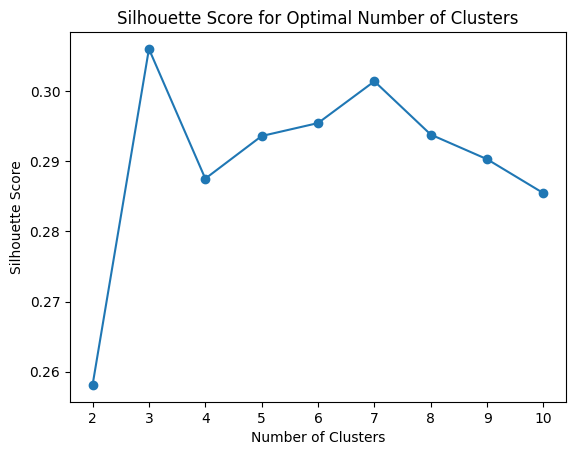

In [28]:
#Silhouette scores method
silhouette_scores = []
num_clusters_range = range(2, 11)
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()



In [29]:
num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, init = 'k-means++', random_state=42, n_init=10)
kmeans.fit(scaled_features)


# Add cluster labels to DataFrame
df_subset['cluster'] = kmeans.labels_

# Analyze and interpret clusters
cluster_summary = df_subset.groupby('cluster')[selected_features].mean()
print("Cluster Summary:")
cluster_summary

Cluster Summary:


C:\Users\Kimberly\AppData\Local\Temp\ipykernel_22728\2839483661.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['cluster'] = kmeans.labels_


,satisfaction_level,last_evaluation,number_project,average_montly_hours
cluster,,,,
0,0.762624,0.787944,3.927916,215.800652
1,0.520525,0.559834,2.904489,158.110268
2,0.182916,0.807198,5.625680,248.570729


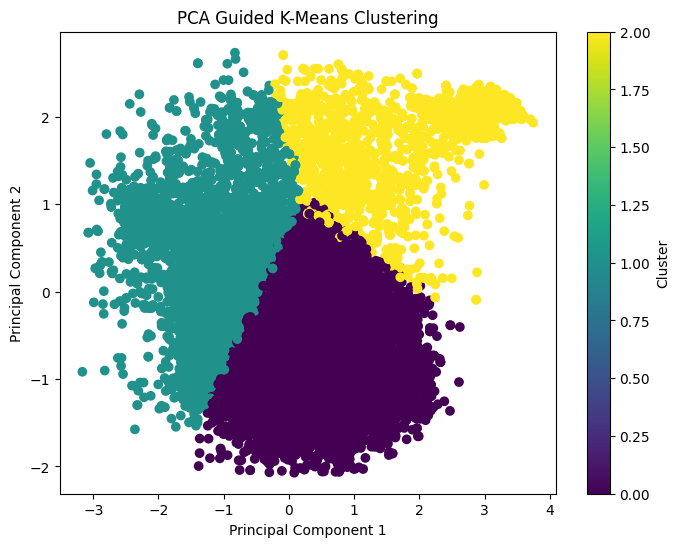

In [30]:
from sklearn.decomposition import PCA
from collections import Counter  # Import Counter class

# Dimensionality reduction for visualization (assuming 4D to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)

# Plot clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', label='Clustered Data')
plt.title('PCA Guided K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

## EDA

C:\Users\Kimberly\AppData\Local\Temp\ipykernel_22728\2851611540.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=kmeans.labels_, palette='Set2')


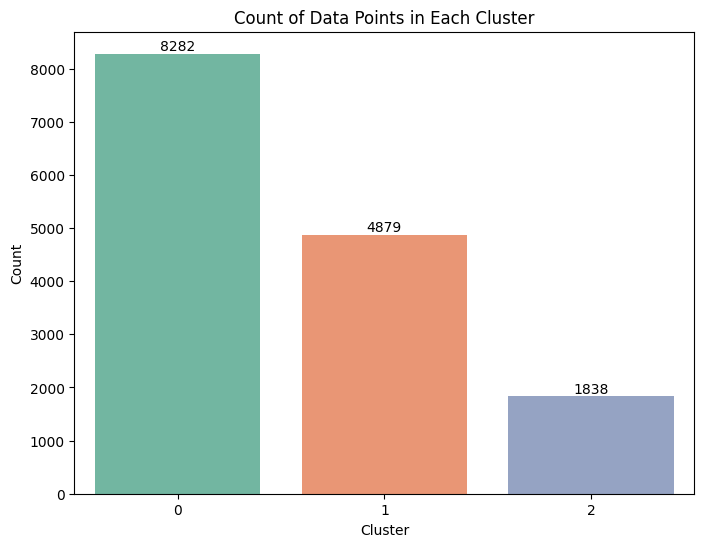

In [31]:
# Count the number of data points in each cluster
cluster_counts = Counter(kmeans.labels_)

# Create a countplot of cluster labels
plt.figure(figsize=(8, 6))
sns.countplot(x=kmeans.labels_, palette='Set2')
plt.title('Count of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')

for cluster, count in sorted(cluster_counts.items()):
    plt.text(cluster, count, str(count), ha='center', va='bottom', fontsize=10)
plt.show()

# Print cluster counts in a table
# print("Cluster Counts:")
# print("--------------")
# for cluster, count in sorted(cluster_counts.items()):
#     print(f"Cluster {cluster}: {count} data points")

from the above, we can see that:
- Cluster 0 - significant portion of employees, approximately 55%
- Cluster 1 - approximately 33% of the employee population
- Cluster 2 - small portion of employees, approximately 12%

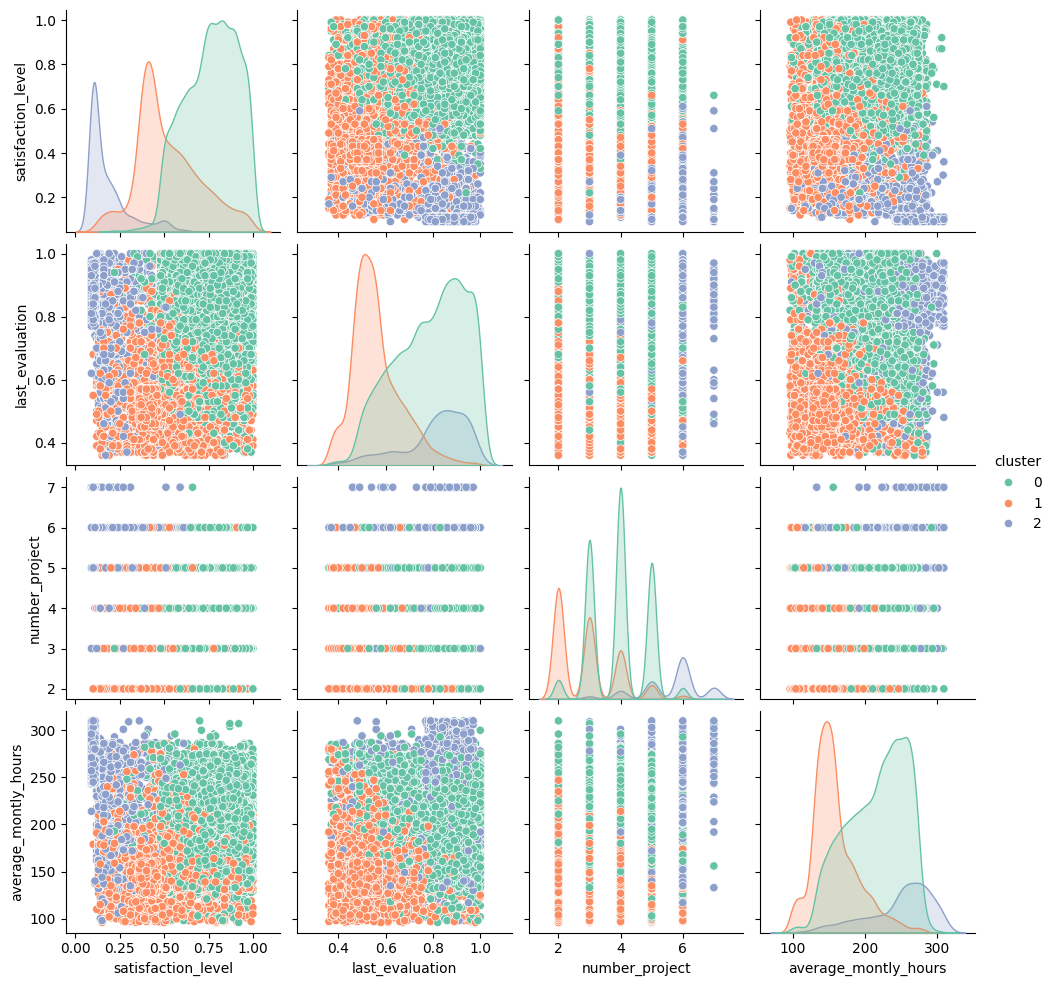

In [10]:
# Perform exploratory data analysis (EDA)
# Visualize feature distributions and relationships

sns.pairplot(df_subset, hue='cluster', palette='Set2')
plt.show()

From the above, we can make the following takeaways for each cluster.

1. **Cluster 0: Engaged and Satisfied Contributors**:
   - high levels of satisfaction
   - high evaluations
   - moderate to high number of projects
   - high average monthly hours 
   
   These results suggest commitment and dedication to their roles.

2. **Cluster 1: Dissatisfied and Disengaged Employees**:
   - moderate satisfaction levels 
   - moderate evaluations
   - low number of projects
   - low average monthly hours
   
   These results may indicate potential dissatisfaction and disengagement.
   Their lower satisfaction levels and evaluations may contribute to increased turnover rates within this group.

3. **Cluster 2: Dissatisfied High Performers**:
   - very low satisfaction levels
   - high evaluations
   - high number if projects
   - high average monthly hours
   
   Employees in this cluster exhibit the lowest satisfaction levels. Their high involvement in projects and long working hours may contribute to burnout and increased turnover rates.

i'll now join back the left column to the dataset to see whether the employees in each cluster were inclined to stay or leave

In [33]:
# Reset index of cluster_df to make the index a regular column
test_df = df_subset
# test_df.reset_index(inplace=True)


keep_features = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'left', 'Emp_Id']

df_selected_left = df[keep_features]
# print(df_selected_left.head())

# Merge cluster_df with original_dataset using the index as the joining key
merged_df = df_selected_left.merge(test_df, left_index=True, right_index=True)

# Display merged DataFrame with cluster information and "left" column
merged_df

# Select only the specified columns
merged_df = merged_df[['satisfaction_level_x', 'last_evaluation_x', 'number_project_x',
                       'average_montly_hours_x', 'left', 'cluster', 'Emp_Id']]

# Rename the columns for clarity
merged_df.rename(columns={
    'satisfaction_level_x': 'satisfaction_level',
    'last_evaluation_x': 'last_evaluation',
    'number_project_x': 'number_project',
    'average_montly_hours_x': 'average_monthly_hours'
}, inplace=True)

# Display the resulting DataFrame
merged_df.head()

merged_df.to_csv('../Dataset/clustering-data.csv', index=False)


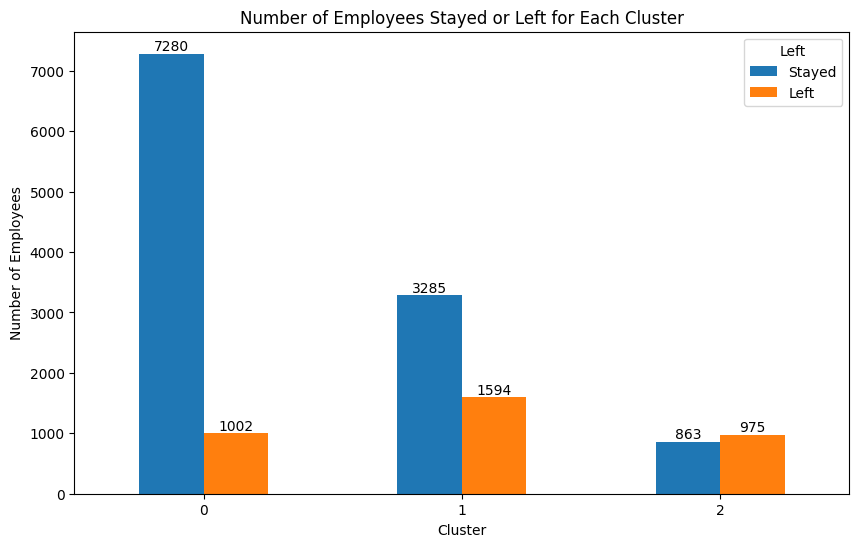

In [12]:
# Group the data by 'cluster' and 'left', and count the number of employees in each group
cluster_left_counts = merged_df.groupby(['cluster', 'left']).size().unstack()

# Plot the bar plot
ax = cluster_left_counts.plot(kind='bar', figsize=(10, 6))

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Number of Employees')
plt.title('Number of Employees Stayed or Left for Each Cluster')

# Show the plot
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.xticks(rotation=0)
plt.show()

# # Print the counts for each cluster
# print("Cluster 0 (Stayed):", cluster_left_counts.loc[0, 0])
# print("Cluster 0 (Left):", cluster_left_counts.loc[0, 1])
# print("Cluster 1 (Stayed):", cluster_left_counts.loc[1, 0])
# print("Cluster 1 (Left):", cluster_left_counts.loc[1, 1])
# print("Cluster 2 (Stayed):", cluster_left_counts.loc[2, 0])
# print("Cluster 2 (Left):", cluster_left_counts.loc[2, 1])



From the above, we can see:

- Cluster 0 - very low turnover rate
- Cluster 1 - approximately a third of employees left
- Cluster 2 - approximately a half of employees left

Based in the data gathered, the following information can be deduced about the employees in different clusters.

1. **Cluster 0: Engaged and Satisfied Contributors**:
   - This cluster comprises a significant portion of employees, approximately 55% of the total workforce.
   - Employees in this cluster demonstrate high levels of satisfaction, reflected in both their evaluations and engagement with their work.
   - They are engaged in a moderate to high number of projects and invest considerable time, with high average monthly hours.
   - These results suggest a strong commitment and dedication to their roles, contributing to their high job satisfaction and low turnover rate.

2. **Cluster 1: Dissatisfied and Disengaged Employees**:
   - Representing approximately a third of the employee population, this cluster exhibits moderate satisfaction levels and evaluations.
   - Employees in this cluster are involved in a low number of projects and have relatively low average monthly hours.
   - These results suggest potential dissatisfaction and disengagement among employees, which may contribute to their increased turnover rates.

3. **Cluster 2: Dissatisfied High Performers**:
   - This cluster comprises a smaller portion of employees, approximately 12% of the workforce.
   - Despite receiving high evaluations and being highly involved in projects, employees in this cluster exhibit the lowest satisfaction levels.
   - They invest significant time and effort, with high average monthly hours and a high number of projects.
   - The disparity between their high performance metrics and low satisfaction levels may lead to burnout and contribute to their increased turnover rates.